In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
pd.set_option("display.max_columns",120)
pd.set_option("display.max_rows",120)

#### Reading the Data

In [3]:
ross_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
store_df = pd.read_csv('store.csv')

In [4]:
ross_df.shape

(55813, 9)

In [5]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


#### Data Processing

In [6]:
merged_df = ross_df.merge(store_df,how='left',on='Store')
merged_test_df = test_df.merge(store_df,how='left',on='Store')

In [7]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0.0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0.0,1.0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0.0,1.0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0.0,1.0,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0.0,1.0,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55808,59,4,2015-06-11,4403,491,1,0,0.0,0.0,a,c,2840.0,6.0,2007.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
55809,60,4,2015-06-11,7289,678,1,0,0.0,0.0,d,c,5540.0,10.0,2009.0,0,NaN,NaN,NaN
55810,61,4,2015-06-11,3446,498,1,0,0.0,0.0,a,c,350.0,12.0,2007.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
55811,62,4,2015-06-11,5975,708,1,0,0.0,0.0,a,a,2050.0,NaN,NaN,0,NaN,NaN,NaN


#### EDA

In [8]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55813 entries, 0 to 55812
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      55813 non-null  int64  
 1   DayOfWeek                  55813 non-null  int64  
 2   Date                       55813 non-null  object 
 3   Sales                      55813 non-null  int64  
 4   Customers                  55813 non-null  int64  
 5   Open                       55813 non-null  int64  
 6   Promo                      55813 non-null  int64  
 7   StateHoliday               55812 non-null  float64
 8   SchoolHoliday              55812 non-null  float64
 9   StoreType                  55813 non-null  object 
 10  Assortment                 55813 non-null  object 
 11  CompetitionDistance        55663 non-null  float64
 12  CompetitionOpenSinceMonth  38100 non-null  float64
 13  CompetitionOpenSinceYear   38100 non-null  flo

In [10]:
merged_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,55813.000000,55813.000000,55813.000000,55813.000000,55813.000000,55813.000000,55812.0,55812.000000,55663.000000,38100.000000,38100.000000,55813.000000,28585.000000,28585.000000
mean,557.406267,4.019977,6115.434648,638.912458,0.863150,0.399548,0.0,0.239178,5403.853727,7.224724,2008.669370,0.512157,23.594228,2011.763162
std,322.178896,1.983740,3754.196751,440.827304,0.343692,0.489810,0.0,0.426585,7658.673513,3.210204,6.189934,0.499857,14.130663,1.673481
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,278.000000,2.000000,4178.000000,436.000000,1.000000,0.000000,0.0,0.000000,710.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,557.000000,4.000000,6020.000000,609.000000,1.000000,0.000000,0.0,0.000000,2320.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.000000,6.000000,8106.000000,816.000000,1.000000,1.000000,0.0,0.000000,6880.000000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.000000,7.000000,41551.000000,4783.000000,1.000000,1.000000,0.0,1.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


#### Preprocessing and Feature Engineering

In [11]:
def split_date(df):
  df['Date'] = pd.to_datetime(df['Date'])
  df['Year'] = df.Date.dt.year
  df['Month'] = df.Date.dt.month
  df['Day'] = df.Date.dt.day
  df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [12]:
split_date(merged_df)
split_date(merged_test_df)

In [13]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0.0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0.0,1.0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0.0,1.0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0.0,1.0,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0.0,1.0,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55808,59,4,2015-06-11,4403,491,1,0,0.0,0.0,a,c,2840.0,6.0,2007.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,6,11,24
55809,60,4,2015-06-11,7289,678,1,0,0.0,0.0,d,c,5540.0,10.0,2009.0,0,NaN,NaN,NaN,2015,6,11,24
55810,61,4,2015-06-11,3446,498,1,0,0.0,0.0,a,c,350.0,12.0,2007.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",2015,6,11,24
55811,62,4,2015-06-11,5975,708,1,0,0.0,0.0,a,a,2050.0,NaN,NaN,0,NaN,NaN,NaN,2015,6,11,24


In [14]:
merged_df[merged_df['Open'] == 0].Sales.value_counts()

Sales
0    7638
Name: count, dtype: int64

In [15]:
merged_df = merged_df[merged_df['Open'] == 1].copy()

In [16]:
merged_df['Open'].value_counts()

Open
1    48175
Name: count, dtype: int64

In [17]:
def comp_months(df):
  df['CompetitionOpen'] = 12*(df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
  df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x:0 if x < 0 else x).fillna(0)

In [18]:
comp_months(merged_df)
comp_months(merged_test_df)

In [19]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0.0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0.0,1.0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0.0,1.0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0.0,1.0,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0.0,1.0,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55808,59,4,2015-06-11,4403,491,1,0,0.0,0.0,a,c,2840.0,6.0,2007.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,6,11,24,96.0
55809,60,4,2015-06-11,7289,678,1,0,0.0,0.0,d,c,5540.0,10.0,2009.0,0,NaN,NaN,NaN,2015,6,11,24,68.0
55810,61,4,2015-06-11,3446,498,1,0,0.0,0.0,a,c,350.0,12.0,2007.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",2015,6,11,24,90.0
55811,62,4,2015-06-11,5975,708,1,0,0.0,0.0,a,a,2050.0,NaN,NaN,0,NaN,NaN,NaN,2015,6,11,24,0.0


In [20]:
def check_promo_month(row):
  month2Str = {
      1: 'Jan', 2: 'Feb', 3: 'March', 4: 'April', 5:'May', 6: 'June', 7:'July',
      8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'
  }
  try:
    months = (row['PromoInterval'] or '').split(',')
    if row['Promo2Open'] and month2Str[row['Month']] in months:
      return 1
    else:
      return 0
  except Exception:
    return 0

def promo_cols(df):
  # Months passed Since Promo2 was open
  df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) + (df.WeekOfYear - df.Promo2SinceWeek) * (0.25)
  df['Promo2Open'] = df['Promo2Open'].fillna(0)
  df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if  x < 0 else x).fillna(0) * df['Promo2']
  #Whether new round of promotions were started in the month
  df['IsPromo2Month'] = df.apply(check_promo_month,axis=1) * df['Promo2']

In [21]:
promo_cols(merged_df)
promo_cols(merged_test_df)

In [22]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,Promo2Open,IsPromo2Month
0,1,5,2015-07-31,5263,555,1,1,0.0,1.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0,0.00,0
1,2,5,2015-07-31,6064,625,1,1,0.0,1.0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0,64.50,0
2,3,5,2015-07-31,8314,821,1,1,0.0,1.0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0,52.25,0
3,4,5,2015-07-31,13995,1498,1,1,0.0,1.0,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0,0.00,0
4,5,5,2015-07-31,4822,559,1,1,0.0,1.0,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55808,59,4,2015-06-11,4403,491,1,0,0.0,0.0,a,c,2840.0,6.0,2007.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,6,11,24,96.0,50.50,0
55809,60,4,2015-06-11,7289,678,1,0,0.0,0.0,d,c,5540.0,10.0,2009.0,0,NaN,NaN,NaN,2015,6,11,24,68.0,0.00,0
55810,61,4,2015-06-11,3446,498,1,0,0.0,0.0,a,c,350.0,12.0,2007.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",2015,6,11,24,90.0,41.75,0
55811,62,4,2015-06-11,5975,708,1,0,0.0,0.0,a,a,2050.0,NaN,NaN,0,NaN,NaN,NaN,2015,6,11,24,0.0,0.00,0


In [23]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [24]:
input_cols = ['Store','DayOfWeek','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionDistance','CompetitionOpen',
                 'Day','Month','Year','WeekOfYear','Promo2','Promo2Open','IsPromo2Month']
target_cols = 'Sales'

In [25]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_cols].copy()

In [26]:
inputs

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,Day,Month,Year,WeekOfYear,Promo2,Promo2Open,IsPromo2Month
0,1,5,1,0.0,1.0,c,a,1270.0,82.0,31,7,2015,31,0,0.00,0
1,2,5,1,0.0,1.0,a,a,570.0,92.0,31,7,2015,31,1,64.50,0
2,3,5,1,0.0,1.0,a,a,14130.0,103.0,31,7,2015,31,1,52.25,0
3,4,5,1,0.0,1.0,c,c,620.0,70.0,31,7,2015,31,0,0.00,0
4,5,5,1,0.0,1.0,a,a,29910.0,3.0,31,7,2015,31,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55808,59,4,0,0.0,0.0,a,c,2840.0,96.0,11,6,2015,24,1,50.50,0
55809,60,4,0,0.0,0.0,d,c,5540.0,68.0,11,6,2015,24,0,0.00,0
55810,61,4,0,0.0,0.0,a,c,350.0,90.0,11,6,2015,24,1,41.75,0
55811,62,4,0,0.0,0.0,a,a,2050.0,0.0,11,6,2015,24,0,0.00,0


In [27]:
targets

0         5263
1         6064
2         8314
3        13995
4         4822
         ...  
55808     4403
55809     7289
55810     3446
55811     5975
55812     5438
Name: Sales, Length: 48175, dtype: int64

In [28]:
test_inputs = merged_test_df[input_cols].copy()

In [29]:
test_inputs

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,Day,Month,Year,WeekOfYear,Promo2,Promo2Open,IsPromo2Month
0,1,4,1,0,0,c,a,1270.0,84.0,17,9,2015,38,0,0.00,0
1,3,4,1,0,0,a,a,14130.0,105.0,17,9,2015,38,1,54.00,0
2,7,4,1,0,0,a,c,24000.0,29.0,17,9,2015,38,0,0.00,0
3,8,4,1,0,0,a,a,7520.0,11.0,17,9,2015,38,0,0.00,0
4,9,4,1,0,0,a,c,2030.0,181.0,17,9,2015,38,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,6,0,0,0,a,a,1900.0,14.0,1,8,2015,31,1,24.00,0
41084,1112,6,0,0,0,c,c,1880.0,112.0,1,8,2015,31,0,0.00,0
41085,1113,6,0,0,0,a,c,9260.0,0.0,1,8,2015,31,0,0.00,0
41086,1114,6,0,0,0,a,c,870.0,0.0,1,8,2015,31,0,0.00,0


In [30]:
inputs

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,Day,Month,Year,WeekOfYear,Promo2,Promo2Open,IsPromo2Month
0,1,5,1,0.0,1.0,c,a,1270.0,82.0,31,7,2015,31,0,0.00,0
1,2,5,1,0.0,1.0,a,a,570.0,92.0,31,7,2015,31,1,64.50,0
2,3,5,1,0.0,1.0,a,a,14130.0,103.0,31,7,2015,31,1,52.25,0
3,4,5,1,0.0,1.0,c,c,620.0,70.0,31,7,2015,31,0,0.00,0
4,5,5,1,0.0,1.0,a,a,29910.0,3.0,31,7,2015,31,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55808,59,4,0,0.0,0.0,a,c,2840.0,96.0,11,6,2015,24,1,50.50,0
55809,60,4,0,0.0,0.0,d,c,5540.0,68.0,11,6,2015,24,0,0.00,0
55810,61,4,0,0.0,0.0,a,c,350.0,90.0,11,6,2015,24,1,41.75,0
55811,62,4,0,0.0,0.0,a,a,2050.0,0.0,11,6,2015,24,0,0.00,0


In [31]:
numeric_cols = ['Store','Promo','SchoolHoliday','CompetitionDistance','CompetitionOpen','Promo2','Promo2Open','IsPromo2Month','Day','Month','Year','WeekOfYear']
categorical_cols = ['DayOfWeek','StateHoliday','StoreType','Assortment']

#### Impute missing data

In [32]:
inputs[numeric_cols].isnull().sum()

Store                    0
Promo                    0
SchoolHoliday            1
CompetitionDistance    129
CompetitionOpen          0
Promo2                   0
Promo2Open               0
IsPromo2Month            0
Day                      0
Month                    0
Year                     0
WeekOfYear               0
dtype: int64

In [33]:
test_inputs[numeric_cols].isnull().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
CompetitionOpen         0
Promo2                  0
Promo2Open              0
IsPromo2Month           0
Day                     0
Month                   0
Year                    0
WeekOfYear              0
dtype: int64

In [34]:
max_distance = inputs['CompetitionDistance'].max()
max_distance

75860.0

In [35]:
inputs['CompetitionDistance'].fillna(max_distance*2,inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance*2,inplace=True)

In [36]:
inputs

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,Day,Month,Year,WeekOfYear,Promo2,Promo2Open,IsPromo2Month
0,1,5,1,0.0,1.0,c,a,1270.0,82.0,31,7,2015,31,0,0.00,0
1,2,5,1,0.0,1.0,a,a,570.0,92.0,31,7,2015,31,1,64.50,0
2,3,5,1,0.0,1.0,a,a,14130.0,103.0,31,7,2015,31,1,52.25,0
3,4,5,1,0.0,1.0,c,c,620.0,70.0,31,7,2015,31,0,0.00,0
4,5,5,1,0.0,1.0,a,a,29910.0,3.0,31,7,2015,31,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55808,59,4,0,0.0,0.0,a,c,2840.0,96.0,11,6,2015,24,1,50.50,0
55809,60,4,0,0.0,0.0,d,c,5540.0,68.0,11,6,2015,24,0,0.00,0
55810,61,4,0,0.0,0.0,a,c,350.0,90.0,11,6,2015,24,1,41.75,0
55811,62,4,0,0.0,0.0,a,a,2050.0,0.0,11,6,2015,24,0,0.00,0


##### Scaling numerical Values

In [37]:
import sklearn

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [40]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
# encoded_cols = list(encoder.get_feature_names(categorical_cols))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [43]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [44]:
encoded_cols

['DayOfWeek_1',
 'DayOfWeek_2',
 'DayOfWeek_3',
 'DayOfWeek_4',
 'DayOfWeek_5',
 'DayOfWeek_6',
 'DayOfWeek_7',
 'StateHoliday_0.0',
 'StateHoliday_nan',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [45]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [46]:
inputs

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,Day,Month,Year,WeekOfYear,Promo2,Promo2Open,IsPromo2Month,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0.0,StateHoliday_nan,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,0.000000,5,1.0,0.0,1.0,c,a,0.008240,0.059163,1.000000,1.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.000898,5,1.0,0.0,1.0,a,a,0.003626,0.066378,1.000000,1.0,0.0,1.0,1.0,0.895833,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.001795,5,1.0,0.0,1.0,a,a,0.093013,0.074315,1.000000,1.0,0.0,1.0,1.0,0.725694,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.002693,5,1.0,0.0,1.0,c,c,0.003955,0.050505,1.000000,1.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.003591,5,1.0,0.0,1.0,a,a,0.197034,0.002165,1.000000,1.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55808,0.052065,4,0.0,0.0,0.0,a,c,0.018589,0.069264,0.333333,0.0,0.0,0.0,1.0,0.701389,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
55809,0.052962,4,0.0,0.0,0.0,d,c,0.036388,0.049062,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
55810,0.053860,4,0.0,0.0,0.0,a,c,0.002175,0.064935,0.333333,0.0,0.0,0.0,1.0,0.579861,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
55811,0.054758,4,0.0,0.0,0.0,a,a,0.013382,0.000000,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [47]:
X = inputs[numeric_cols+encoded_cols]
X_test = inputs[numeric_cols+encoded_cols]

In [48]:
X

,Store,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpen,Promo2,Promo2Open,IsPromo2Month,Day,Month,Year,WeekOfYear,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0.0,StateHoliday_nan,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,0.000000,1.0,1.0,0.008240,0.059163,0.0,0.000000,0.0,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.000898,1.0,1.0,0.003626,0.066378,1.0,0.895833,0.0,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.001795,1.0,1.0,0.093013,0.074315,1.0,0.725694,0.0,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.002693,1.0,1.0,0.003955,0.050505,0.0,0.000000,0.0,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.003591,1.0,1.0,0.197034,0.002165,0.0,0.000000,0.0,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55808,0.052065,0.0,0.0,0.018589,0.069264,1.0,0.701389,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
55809,0.052962,0.0,0.0,0.036388,0.049062,0.0,0.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
55810,0.053860,0.0,0.0,0.002175,0.064935,1.0,0.579861,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
55811,0.054758,0.0,0.0,0.013382,0.000000,0.0,0.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [49]:
X_test

,Store,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpen,Promo2,Promo2Open,IsPromo2Month,Day,Month,Year,WeekOfYear,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0.0,StateHoliday_nan,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,0.000000,1.0,1.0,0.008240,0.059163,0.0,0.000000,0.0,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.000898,1.0,1.0,0.003626,0.066378,1.0,0.895833,0.0,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.001795,1.0,1.0,0.093013,0.074315,1.0,0.725694,0.0,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.002693,1.0,1.0,0.003955,0.050505,0.0,0.000000,0.0,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.003591,1.0,1.0,0.197034,0.002165,0.0,0.000000,0.0,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55808,0.052065,0.0,0.0,0.018589,0.069264,1.0,0.701389,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
55809,0.052962,0.0,0.0,0.036388,0.049062,0.0,0.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
55810,0.053860,0.0,0.0,0.002175,0.064935,1.0,0.579861,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
55811,0.054758,0.0,0.0,0.013382,0.000000,0.0,0.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


##### Training

In [50]:
from xgboost import XGBRegressor

In [56]:
?XGBRegressor

In [57]:
model = XGBRegressor(random_state=42,n_jobs=-1,n_estimators=20,max_depth=4)

In [58]:
%%time
model.fit(X,targets)

CPU times: user 243 ms, sys: 7.8 ms, total: 251 ms
Wall time: 152 ms


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

#### Prediction

In [59]:
preds = model.predict(X)

In [60]:
preds

array([7729.9956, 7121.6147, 7538.252 , ..., 6090.411 , 5761.041 ,
       5706.172 ], dtype=float32)

#### Evaluation

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
def rmse(a,b):
  return mean_squared_error(a,b,squared=False)

In [63]:
rmse(preds,targets)

2259.6973687212476

#### Visualization

In [64]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

<Axes: >

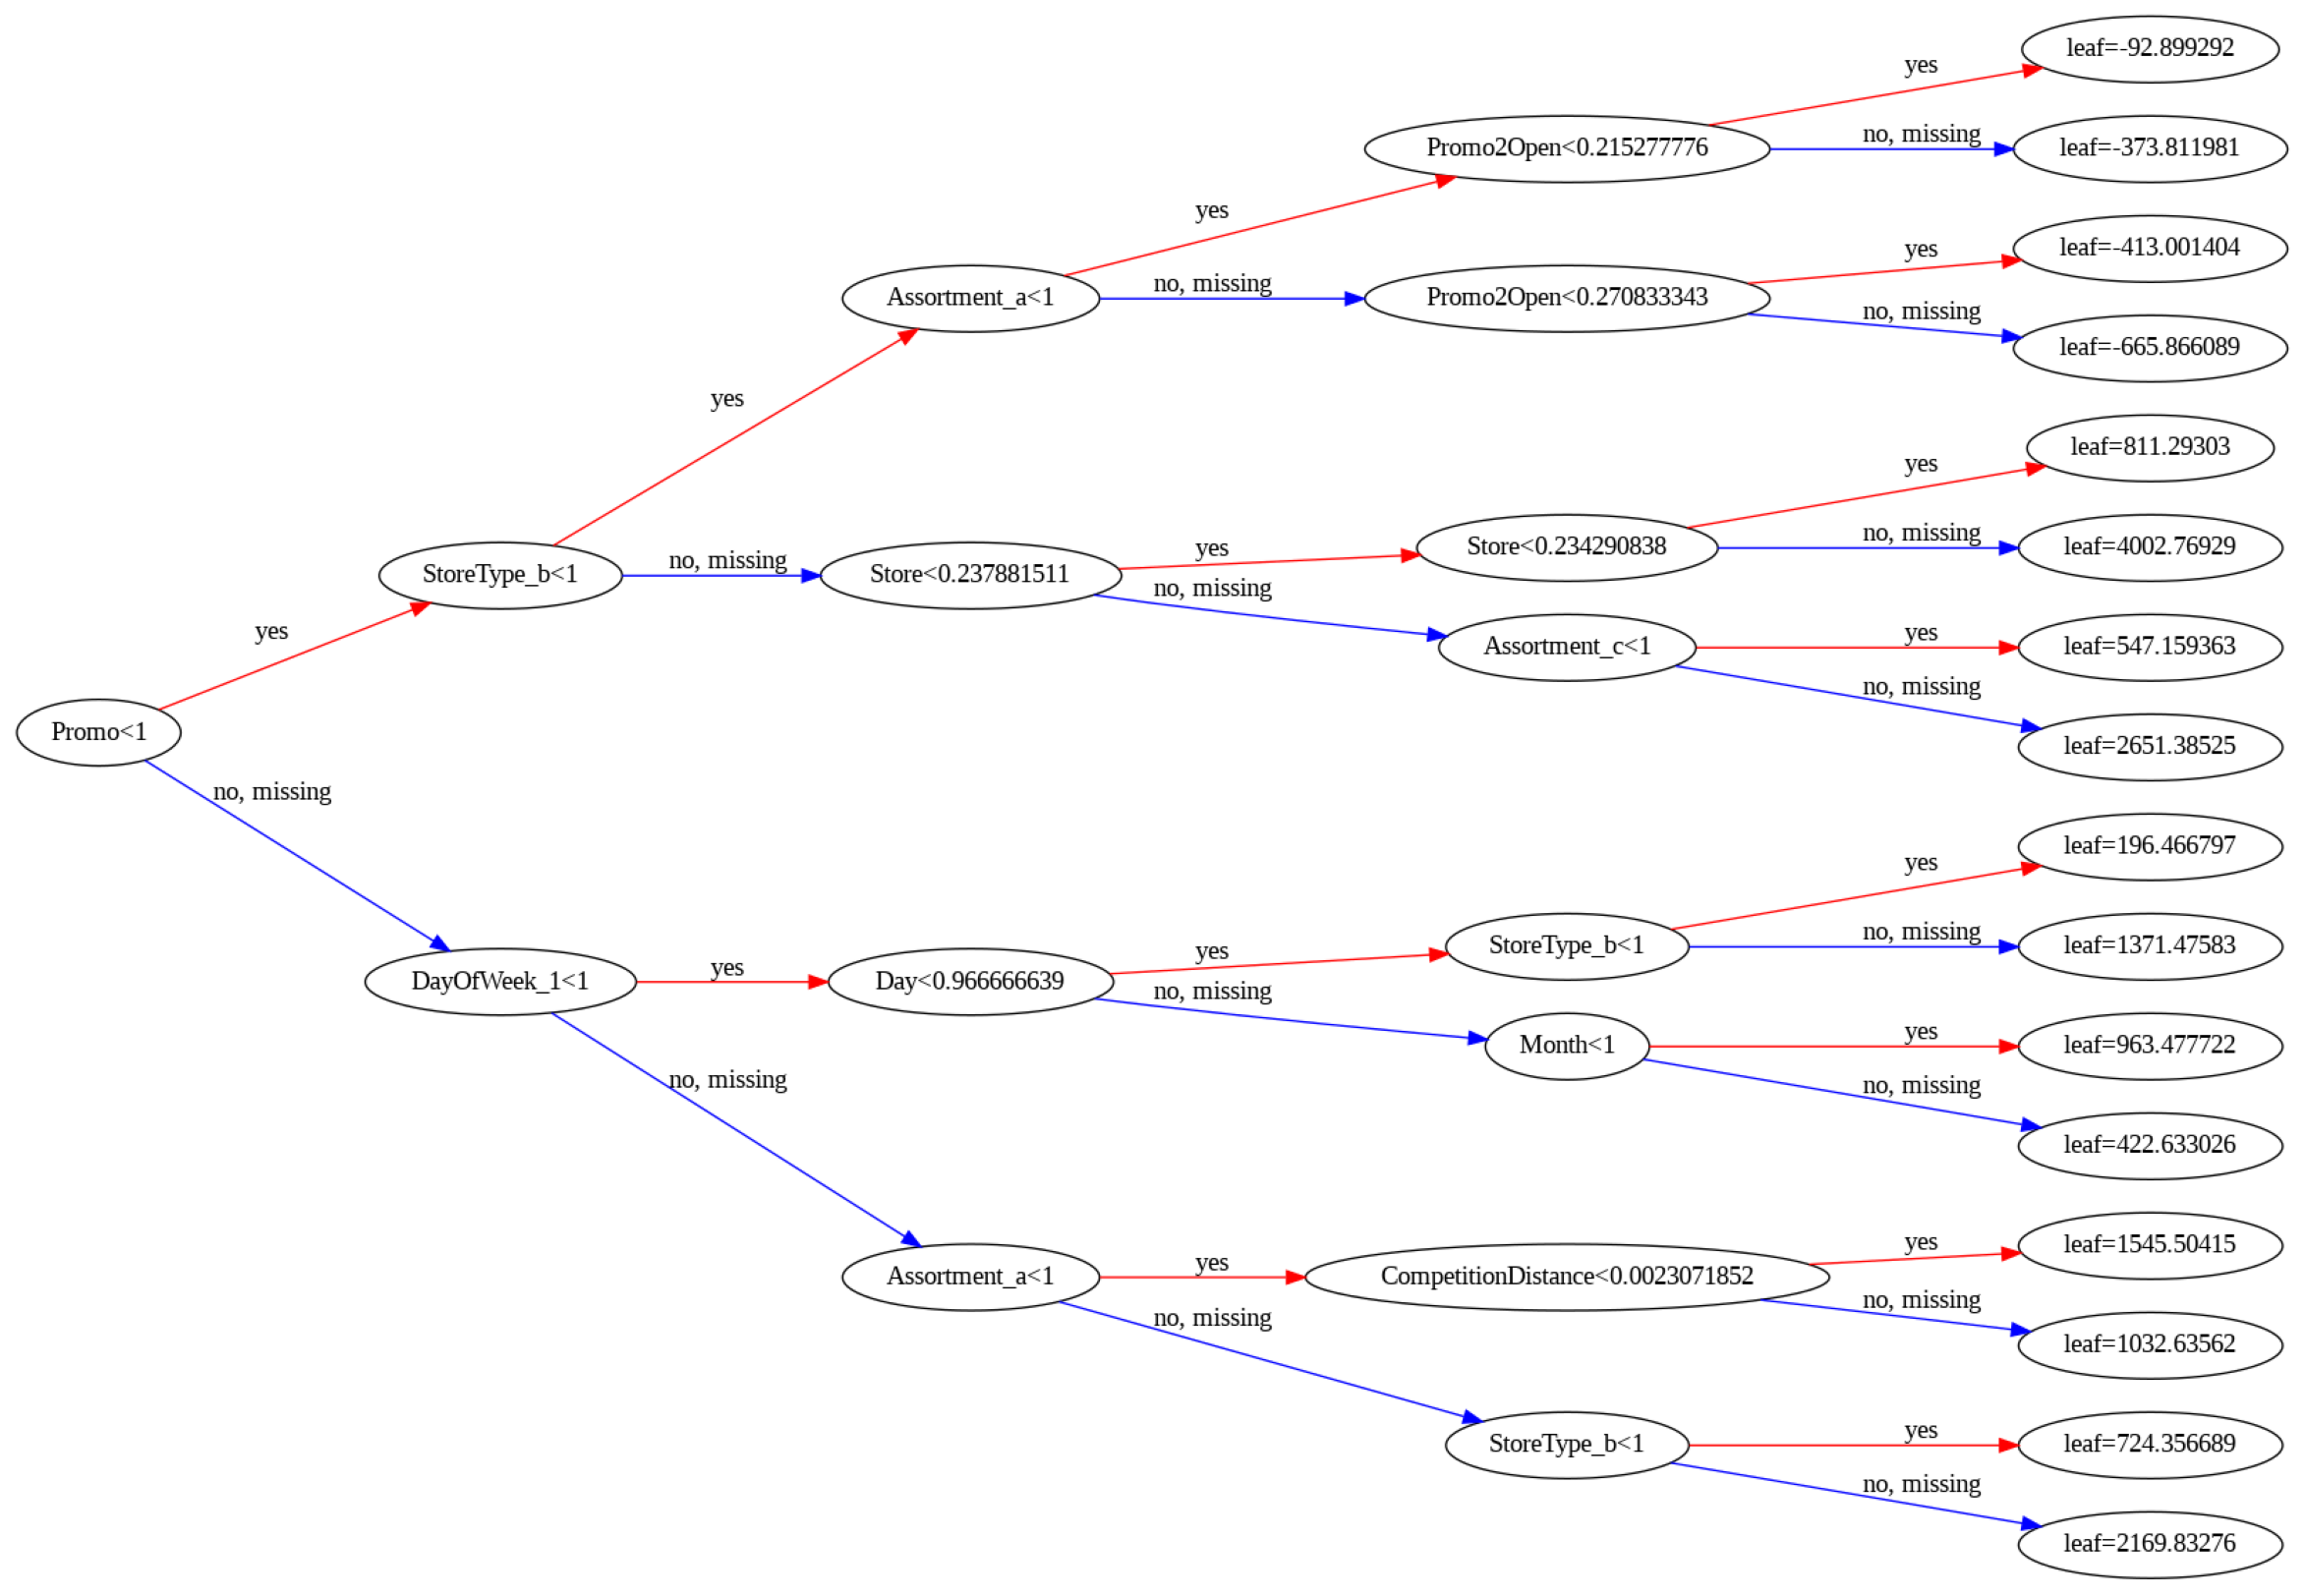

In [65]:
plot_tree(model,rankdir='LR',num_trees=0)

<Axes: >

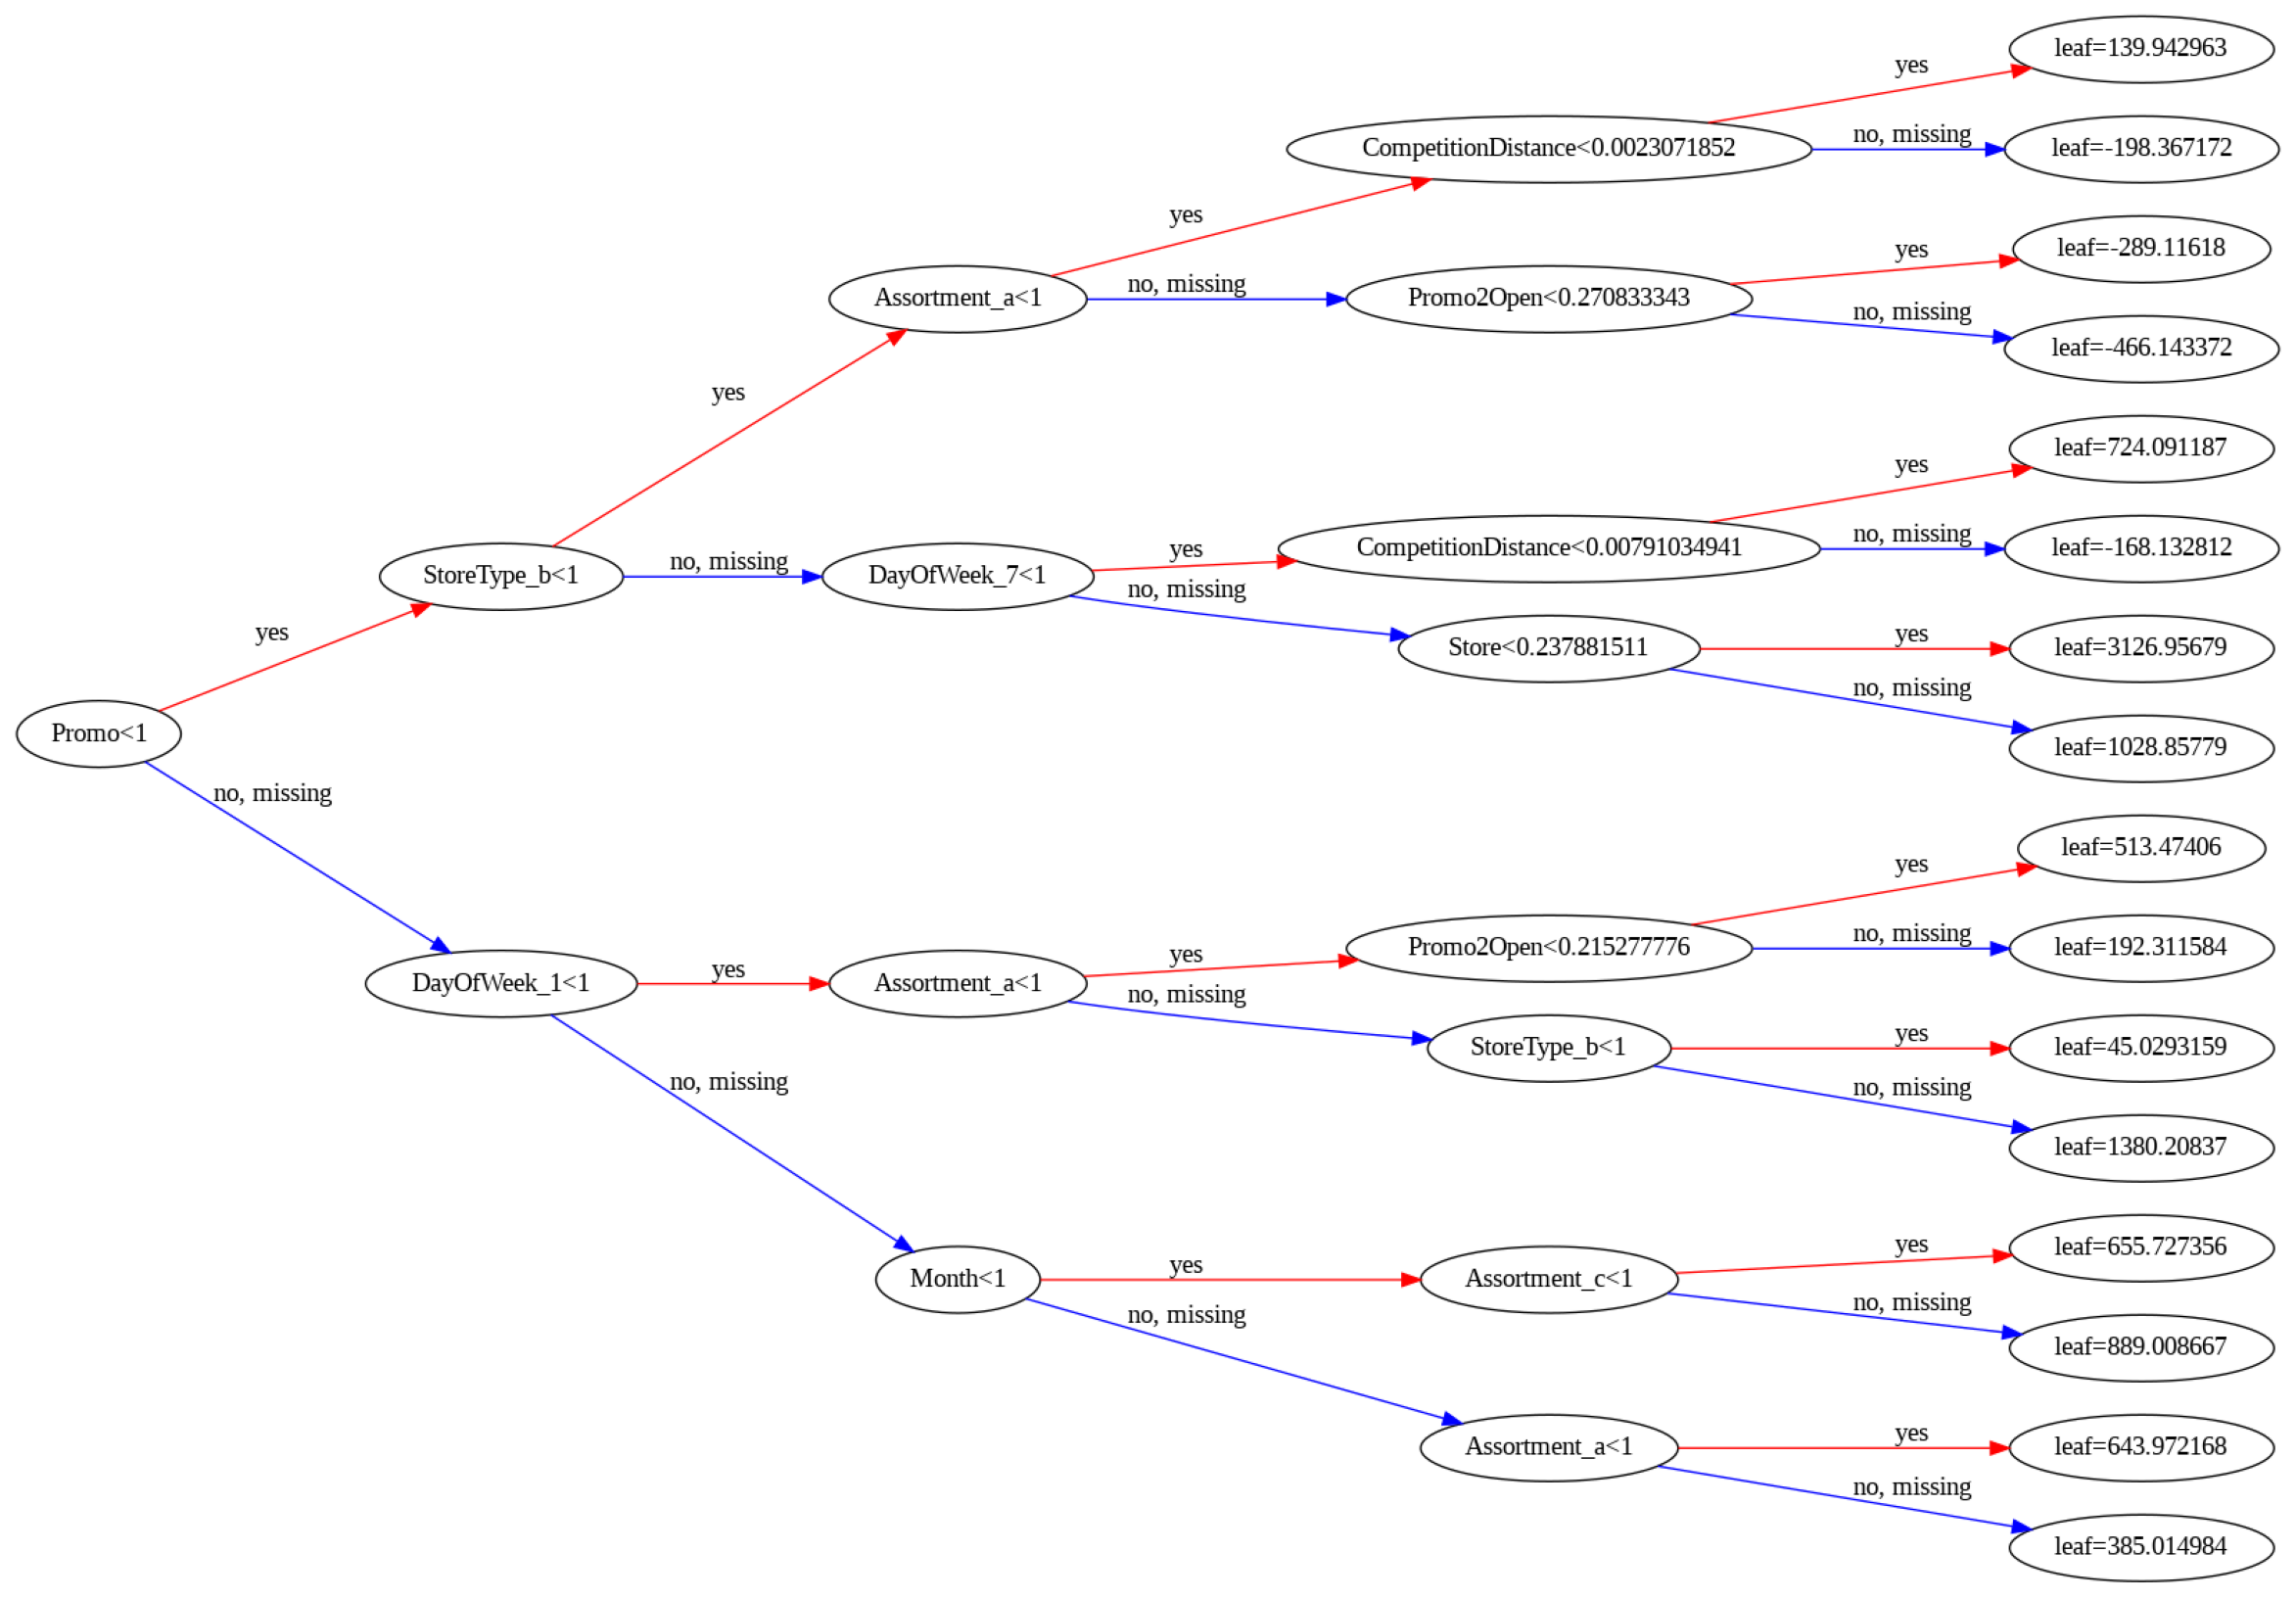

In [68]:
plot_tree(model,rankdir='LR',num_trees=1)

<Axes: >

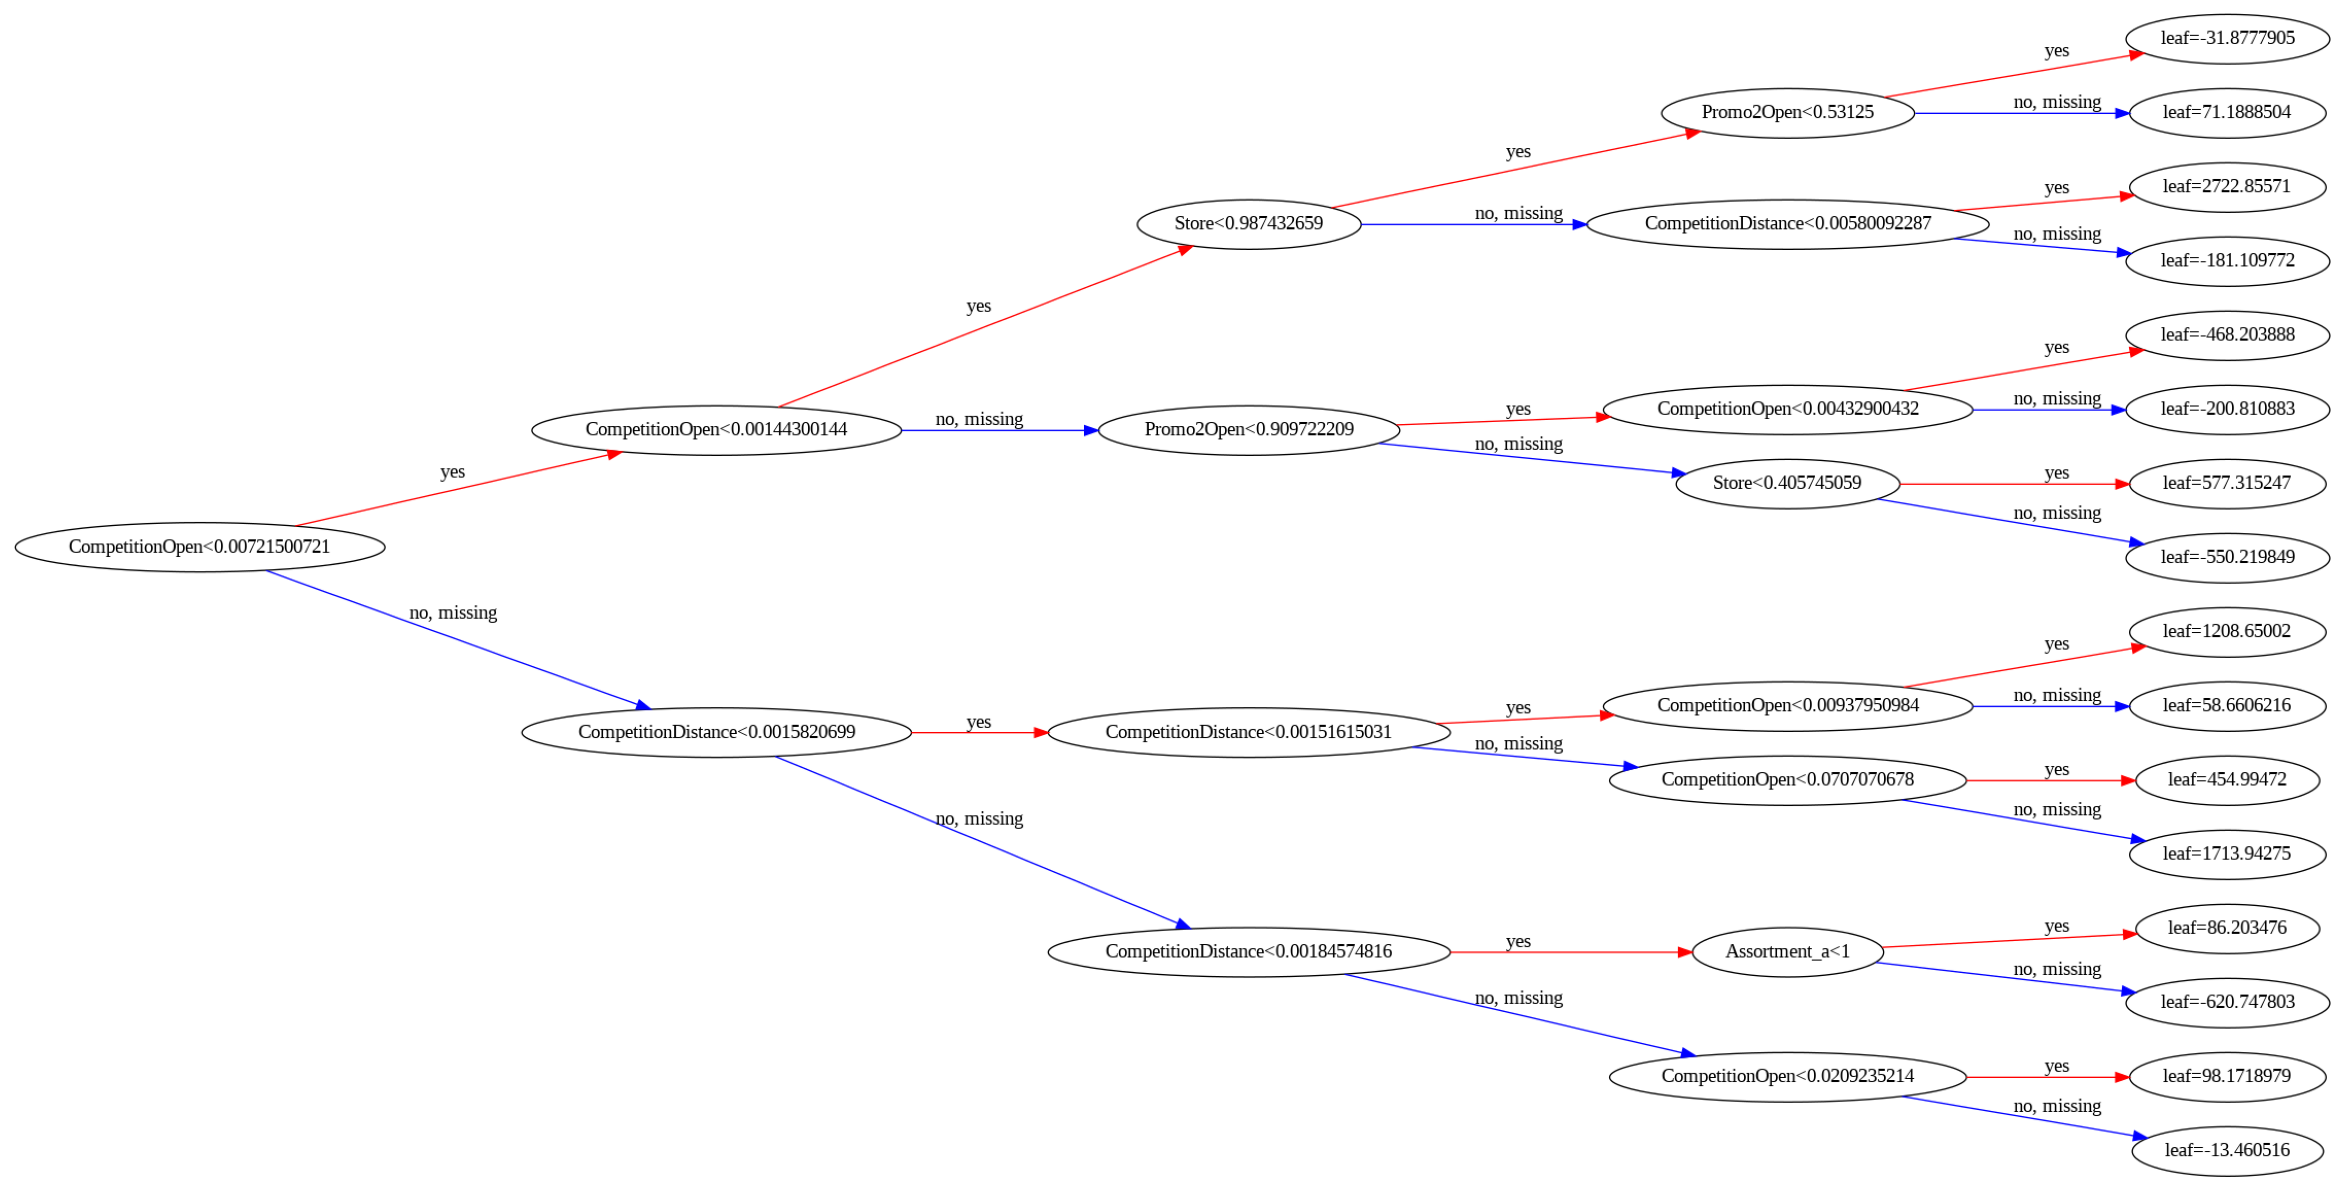

In [69]:
plot_tree(model,rankdir='LR',num_trees=19)

In [70]:
trees = model.get_booster().get_dump()

In [71]:
len(trees)

20

In [72]:
print(trees[0])

0:[Promo<1] yes=1,no=2,missing=2
	1:[StoreType_b<1] yes=3,no=4,missing=4
		3:[Assortment_a<1] yes=7,no=8,missing=8
			7:[Promo2Open<0.215277776] yes=15,no=16,missing=16
				15:leaf=-92.899292
				16:leaf=-373.811981
			8:[Promo2Open<0.270833343] yes=17,no=18,missing=18
				17:leaf=-413.001404
				18:leaf=-665.866089
		4:[Store<0.237881511] yes=9,no=10,missing=10
			9:[Store<0.234290838] yes=19,no=20,missing=20
				19:leaf=811.29303
				20:leaf=4002.76929
			10:[Assortment_c<1] yes=21,no=22,missing=22
				21:leaf=547.159363
				22:leaf=2651.38525
	2:[DayOfWeek_1<1] yes=5,no=6,missing=6
		5:[Day<0.966666639] yes=11,no=12,missing=12
			11:[StoreType_b<1] yes=23,no=24,missing=24
				23:leaf=196.466797
				24:leaf=1371.47583
			12:[Month<1] yes=25,no=26,missing=26
				25:leaf=963.477722
				26:leaf=422.633026
		6:[Assortment_a<1] yes=13,no=14,missing=14
			13:[CompetitionDistance<0.0023071852] yes=27,no=28,missing=28
				27:leaf=1545.50415
				28:leaf=1032.63562
			14:[StoreType_b<1] yes=29

#### Feature Importance

In [74]:
importance_df = pd.DataFrame({
      'feature': X.columns,
      'importance': model.feature_importances_
}).sort_values('importance',ascending=False)

In [75]:
importance_df.head(10)

,feature,importance
1,Promo,0.363605
12,DayOfWeek_1,0.128285
22,StoreType_b,0.068862
5,Promo2,0.050789
13,DayOfWeek_2,0.046668
25,Assortment_a,0.042873
9,Month,0.033721
3,CompetitionDistance,0.031575
6,Promo2Open,0.031211
8,Day,0.027131


<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

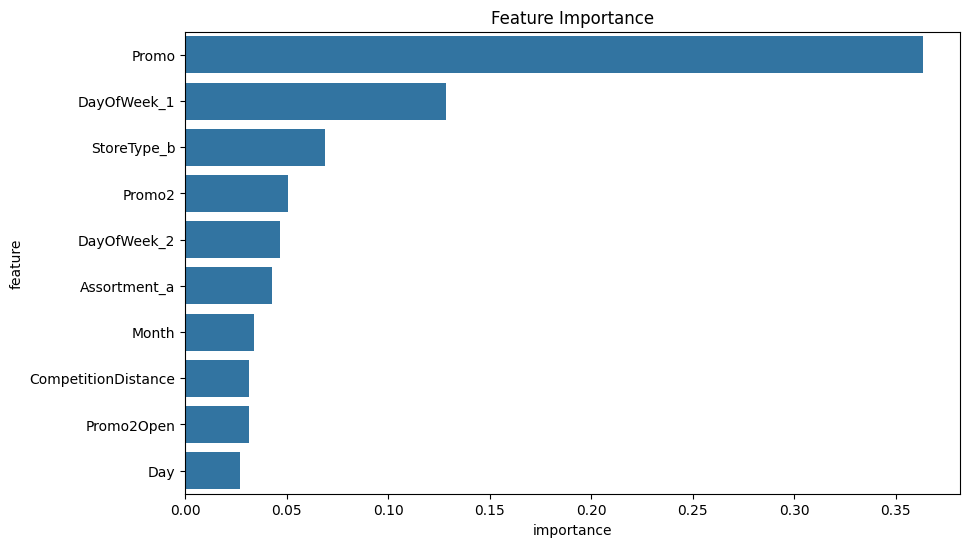

In [76]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10),x='importance',y='feature')

In [77]:
from sklearn.model_selection import KFold

In [78]:
def train_and_evaluate(X_train,train_targets,X_val, val_targets,**params):
  model = XGBRegressor(random_state=42,n_jobs=-1,**params)
  model.fit(X_train,train_targets)
  train_rmse = rmse(model.predict(X_train),train_targets)
  val_rmse = rmse(model.predict(X_val),val_targets)
  return model,train_rmse,val_rmse

In [79]:
kfold = KFold(n_splits=5)

In [82]:
models = []

for train_idxs,val_idxs in kfold.split(X):
  X_train,train_targets = X.iloc[train_idxs],targets.iloc[train_idxs]
  X_val,val_targets = X.iloc[val_idxs],targets.iloc[val_idxs]
  model,train_rmse,val_rmse = train_and_evaluate(X_train,train_targets,X_val,val_targets,max_depth=4,n_estimators=20)
  models.append(model)

In [85]:
import numpy as np

def pred_avg(models,input):
  return np.mean([model.predict(input) for model in models],axis=0)

In [86]:
preds = pred_avg(models,X)
preds


array([8082.991 , 7454.862 , 7993.845 , ..., 6163.9424, 5372.3774,
       5761.1035], dtype=float32)

In [89]:
from sklearn.model_selection import train_test_split

In [93]:
X_train,X_val,train_targets,val_targets = train_test_split(X,targets,test_size=0.1)

In [98]:
def test_params(**params):
  model = XGBRegressor(n_jobs=-1,random_state=42,**params)
  model.fit(X_train,train_targets)
  train_rmse = rmse(model.predict(X_train),train_targets)
  test_rmse = rmse(model.predict(X_val),test_targets)
  print('Train rmse {} , Validation rmse {}'.format(train_rmse,test_rmse))

In [107]:
test_params(n_estimators=6)

Train rmse 2360.314491109312 , Validation rmse 3427.1958355306015


In [126]:
test_params(max_depth=5,n_estimators=4,learning_rate=0.9)

Train rmse 2289.482893183125 , Validation rmse 3664.8318057458946


In [127]:
#booster

In [128]:
test_params(booster='gblinear')

Train rmse 2609.310684570598 , Validation rmse 3474.7344623736926


#### Putting it all together

In [129]:
model = XGBRegressor(n_jobs=-1,random_state=42,n_estimators=100,learning_rate=0.2,max_depth=10,subsample=0.9,colsample_bytree=0.7)

In [130]:
%%time
model.fit(X,targets)

CPU times: user 1.71 s, sys: 19.1 ms, total: 1.73 s
Wall time: 889 ms


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [136]:
train_preds = model.predict(X_train)

In [138]:
err = rmse(train_preds,train_targets)
err

511.7131986048501

In [139]:
val_pred = model.predict(X_val)

In [140]:
val_err = rmse(val_pred,val_targets)
val_err

511.9079333420027

In [141]:
# X_train,X_val,train_targets,val_targets

In [142]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [150]:
test_pred = model.predict(X_test)

In [151]:
test_pred

array([5420.055 , 6073.0005, 8343.886 , ..., 3907.604 , 5904.903 ,
       5753.1787], dtype=float32)

In [147]:
submission_df = pd.read_csv('sample_submission.csv')

In [152]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [154]:
X_test

,Store,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpen,Promo2,Promo2Open,IsPromo2Month,Day,Month,Year,WeekOfYear,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0.0,StateHoliday_nan,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,0.000000,1.0,1.0,0.008240,0.059163,0.0,0.000000,0.0,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.000898,1.0,1.0,0.003626,0.066378,1.0,0.895833,0.0,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.001795,1.0,1.0,0.093013,0.074315,1.0,0.725694,0.0,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.002693,1.0,1.0,0.003955,0.050505,0.0,0.000000,0.0,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.003591,1.0,1.0,0.197034,0.002165,0.0,0.000000,0.0,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55808,0.052065,0.0,0.0,0.018589,0.069264,1.0,0.701389,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
55809,0.052962,0.0,0.0,0.036388,0.049062,0.0,0.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
55810,0.053860,0.0,0.0,0.002175,0.064935,1.0,0.579861,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
55811,0.054758,0.0,0.0,0.013382,0.000000,0.0,0.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [153]:
submission_df['Sales'] = test_pred

ValueError: Length of values (48175) does not match length of index (41088)